In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv")
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [3]:
# Dataframe for binary classification
bin_df = df.drop("Attack_type",axis = 1)



In [4]:


drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

bin_df.drop(drop_columns, axis=1, inplace=True)


In [5]:
bin_df.drop_duplicates(subset = None, keep="first",inplace = True)

In [6]:
len(bin_df)

1925910

In [7]:
from sklearn.utils import shuffle
bin_df = shuffle(bin_df)

In [8]:
pd.get_dummies(bin_df["http.request.method"])

,0.0,0,0.0,GET,OPTIONS,POST,PROPFIND,PUT,SEARCH,TRACE
1457886,True,False,False,False,False,False,False,False,False,False
2154355,True,False,False,False,False,False,False,False,False,False
1765275,True,False,False,False,False,False,False,False,False,False
2069337,True,False,False,False,False,False,False,False,False,False
1822556,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1868187,True,False,False,False,False,False,False,False,False,False
674807,True,False,False,False,False,False,False,False,False,False
743764,True,False,False,False,False,False,False,False,False,False
2008580,True,False,False,False,False,False,False,False,False,False


In [9]:
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name], dtype=int)

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(bin_df,'http.request.method')

encode_text_dummy(bin_df,'http.referer')

encode_text_dummy(bin_df,"http.request.version")

encode_text_dummy(bin_df,"dns.qry.name.len")

encode_text_dummy(bin_df,"mqtt.conack.flags")

encode_text_dummy(bin_df,"mqtt.protoname")

encode_text_dummy(bin_df,"mqtt.topic")

In [10]:
x = bin_df.drop("Attack_label", axis = 1)
y = bin_df["Attack_label"]

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle = True,random_state = 42,stratify = y)

In [12]:
len(x_train),len(y_train),len(x_test),len(y_test)

(1348137, 1348137, 577773, 577773)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

parameters = {'solver' : ('lbfgs', 'liblinear', 'newton-cg'),
              'penalty' : ('l2','l1','elasticnet'),
              'max_iter' : (10,50,100)
             }

clf = LogisticRegression()
model = GridSearchCV(clf,parameters,scoring= "accuracy")

model.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': (10, 50, 100),
                         'penalty': ('l2', 'l1', 'elasticnet'),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg')},
             scoring='accuracy')

In [14]:
model.best_params_

{'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [15]:
y_preds = model.predict(x_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    414257
           1       1.00      1.00      1.00    163516

    accuracy                           1.00    577773
   macro avg       1.00      1.00      1.00    577773
weighted avg       1.00      1.00      1.00    577773



In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_preds)

0.999998269216457

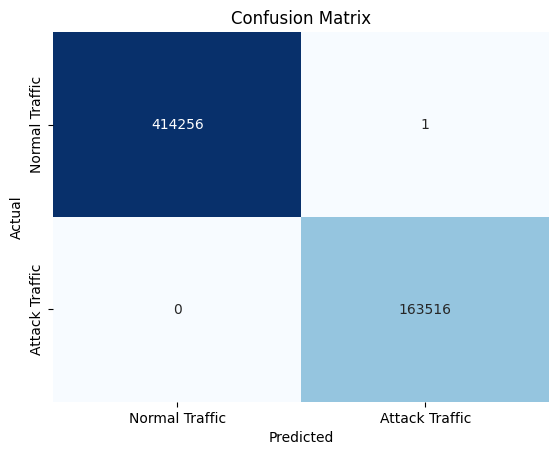

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(y_test,y_preds,labels = model.classes_)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["Normal Traffic", "Attack Traffic"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["Normal Traffic", "Attack Traffic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


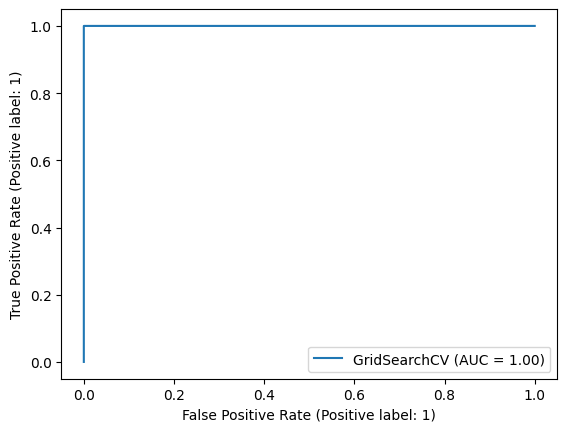

In [19]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model,x_test,y_test);


In [20]:
import pickle

with open('lr_model.pkl', 'wb') as file:
    pickle.dump(model, file)